In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import sklearn
import sklearn.datasets
import sklearn.linear_model

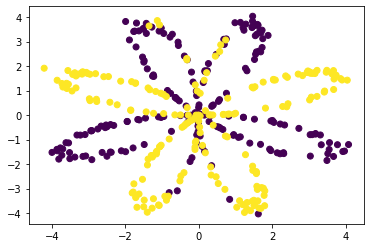

In [3]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

X, Y = load_planar_dataset()
plt.scatter(X[0,:],X[1,:], c = Y)
plt.show()

In [6]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s
    
def layer_sizes(X, Y):

    n_x = X.shape[0] # Input size
    n_h = 4 # Hidden layer size
    n_y = Y.shape[0] # output size

    return (n_x, n_h, n_y)

def initialize_parameters(n_x, n_h, n_y):

    W1 = np.random.randn(n_h, n_x)*.01 # Hidden layer weights
    b1 = np.zeros((n_h,1)) # Hidden layer biases
    W2 = np.random.randn(n_y, n_h)*.01 # Output layer weights
    b2 = np.zeros((n_y,1)) # Output layer biases

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def forward_propagation(X, parameters):
    # Get the output of the network by inputting the
    # training data to it (Forward propagation)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1)+b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

def compute_cost(A2, Y):
    # Compute the logit cost on the entire training set
    
    m = Y.shape[1] # number of examples
    cost = 1/m * np.sum(-(Y*np.log(A2) + (1-Y)*(np.log(1-A2))))
    cost = float(np.squeeze(cost))
                                  
    return cost

def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2-Y
    dW2 = 1/m*np.matmul(dZ2,A1.T)
    db2 = 1/m*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.multiply(np.matmul(W2.T,dZ2),(1 - np.power(A1, 2)))
    dW1 = 1/m*np.matmul(dZ1,X.T)
    db1 = 1/m*np.sum(dZ1, axis = 1, keepdims = True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

def update_parameters(parameters, grads, learning_rate = 1.2):
    
    parameters = copy.deepcopy(parameters)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):

    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_iterations):
        
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

def predict(parameters, X):
    
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > .5
    
    return predictions